# 아래 데이터를 이용하여 각 항목별 연관관계를 분석하고
# 선형회귀분석 기법을 통해 상관관계를 그래프로 표시하시오.
- index_price : 물가지수  
- interest_rate : 이자율
- unemployment_rate : 실업률

In [97]:
import pandas as pd
import matplotlib.pyplot as plt

data = {'year': [2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2016,
                 2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016],
        'month': [12,11,10,9,8,7,6,5,4,3,2,1,12,11,10,9,8,7,6,5,4,3,2,1],
        'interest_rate': [2.75,2.5,2.5,2.5,2.5,2.5,2.5,2.25,2.25,2.25,2,2,2,
                          1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75],
        'unemployment_rate': [5.3,5.3,5.3,5.3,5.4,5.6,5.5,5.5,5.5,5.6,5.7,5.9,6,5.9,
                              5.8,6.1,6.2,6.1,6.1,6.1,5.9,6.2,6.2,6.1],
        'index_price': [1464,1394,1357,1293,1256,1254,1234,1195,1159,1167,1130,1075,
                        1047,965,943,958,971,949,884,866,876,822,704,719]}

df=pd.DataFrame(data)
print(df)

    year  month  interest_rate  unemployment_rate  index_price
0   2017     12           2.75                5.3         1464
1   2017     11           2.50                5.3         1394
2   2017     10           2.50                5.3         1357
3   2017      9           2.50                5.3         1293
4   2017      8           2.50                5.4         1256
5   2017      7           2.50                5.6         1254
6   2017      6           2.50                5.5         1234
7   2017      5           2.25                5.5         1195
8   2017      4           2.25                5.5         1159
9   2017      3           2.25                5.6         1167
10  2017      2           2.00                5.7         1130
11  2017      1           2.00                5.9         1075
12  2016     12           2.00                6.0         1047
13  2016     11           1.75                5.9          965
14  2016     10           1.75                5.8      

In [98]:
interest_rate=df['interest_rate'].to_numpy()
interest_rate

array([2.75, 2.5 , 2.5 , 2.5 , 2.5 , 2.5 , 2.5 , 2.25, 2.25, 2.25, 2.  ,
       2.  , 2.  , 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75,
       1.75, 1.75])

In [99]:
index_price=df['index_price'].to_numpy()
index_price

array([1464, 1394, 1357, 1293, 1256, 1254, 1234, 1195, 1159, 1167, 1130,
       1075, 1047,  965,  943,  958,  971,  949,  884,  866,  876,  822,
        704,  719], dtype=int64)

## 선형 회귀 : 이자율과 물가지수 상관관계 분석
- 물가지수와 이자율 산점도 및 선형 회귀 분석

In [100]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target=train_test_split(
interest_rate, index_price, random_state=42)

In [101]:
print(train_input.shape, test_input.shape)

(18,) (6,)


In [102]:
train_input=train_input.reshape(-1, 1)
test_input=test_input.reshape(-1, 1)
print(train_input.shape, test_input.shape)

(18, 1) (6, 1)


In [103]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(train_input, train_target)
print(lr.coef_, lr.intercept_)

[574.45637584] -127.38255033557084


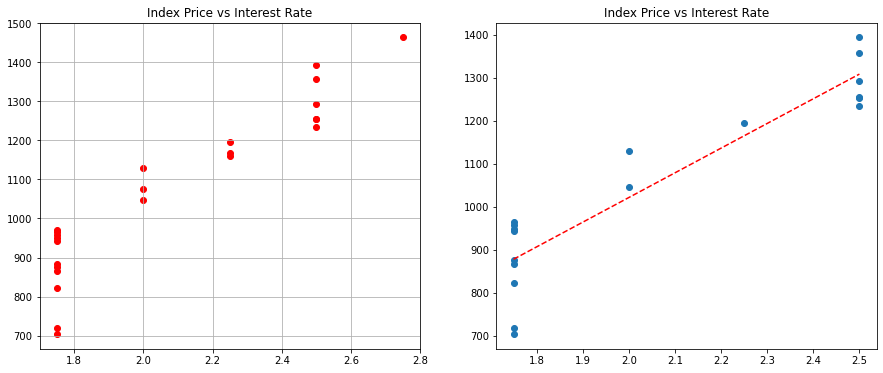

In [110]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.scatter(interest_rate, index_price, color='red')
plt.grid(True)
plt.title('Index Price vs Interest Rate')

plt.subplot(1, 2, 2)
plt.scatter(train_input, train_target)
plt.plot([1.75, 2.5], [1.75*lr.coef_+lr.intercept_, 2.5*lr.coef_+lr.intercept_], color='red',
        linestyle='--')
plt.title('Index Price vs Interest Rate')
plt.show()

In [91]:
print('train data score :', lr.score(train_input, train_target))
print('test data score :', lr.score(test_input, test_target))

train data score : 0.8541859618501457
test data score : 0.941892392945057


## 다항 회귀 : 이자율과 물가지수 상관관계 분석

In [92]:
import numpy as np
train_poly=np.column_stack((train_input**2, train_input))
test_poly=np.column_stack((test_input**2, test_input))

print(train_poly[:5])
print(train_poly.shape, test_poly.shape)

[[3.0625 1.75  ]
 [6.25   2.5   ]
 [3.0625 1.75  ]
 [6.25   2.5   ]
 [6.25   2.5   ]]
(18, 2) (6, 2)


In [93]:
lr=LinearRegression()
lr.fit(train_poly, train_target)

print(lr.coef_, lr.intercept_)

[-524.84946237 2802.42473118] -2429.1028225806517


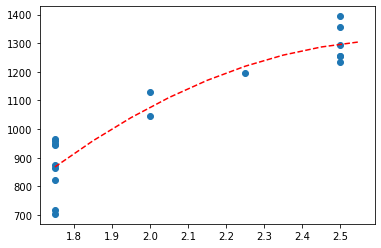

In [95]:
point=np.arange(1.75, 2.551, 0.1)
plt.scatter(train_input, train_target)
plt.plot(point, -524.8*point**2 + 2802.4*point -2429.1,
        color='red', linestyle='--')
plt.show()

In [65]:
print('다항 회귀 train data score :', lr.score(train_poly, train_target))
print('다항 회귀 test data score :', lr.score(test_poly, test_target))

다항 회귀 train data score : 0.8676269364555872
다항 회귀 test data score : 0.7945265214367343


## 선형 회귀 : 실업률과 물가지수 상관관계 분석
- 실업률과 물가지수 산점도 및 선형회귀분석

In [112]:
unemployment_rate=df['unemployment_rate'].to_numpy()
unemployment_rate

array([5.3, 5.3, 5.3, 5.3, 5.4, 5.6, 5.5, 5.5, 5.5, 5.6, 5.7, 5.9, 6. ,
       5.9, 5.8, 6.1, 6.2, 6.1, 6.1, 6.1, 5.9, 6.2, 6.2, 6.1])

In [137]:
train_input, test_input, train_target, test_target=train_test_split(
unemployment_rate, index_price, random_state=42)

In [138]:
train_input=train_input.reshape(-1, 1)
test_input=test_input.reshape(-1, 1)

print(train_input.shape, test_input.shape)

(18, 1) (6, 1)


In [139]:
lr.fit(train_input, train_target)
print(lr.coef_, lr.intercept_)

[-611.41330166] 4586.05463182898


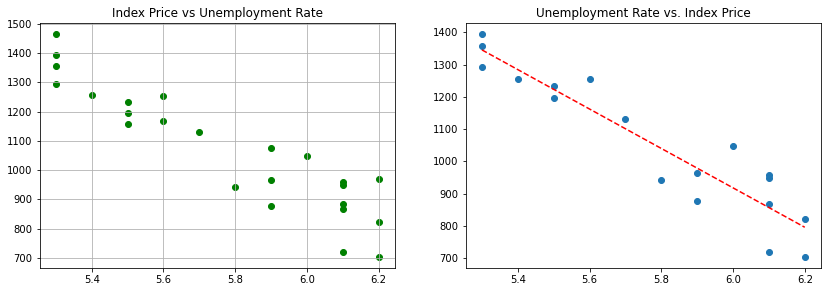

In [140]:
plt.figure(figsize=(14, 4.5))

plt.subplot(1, 2, 1)
plt.scatter(unemployment_rate, index_price, color='green')
plt.grid(True)
plt.title('Index Price vs Unemployment Rate')

plt.subplot(1, 2, 2)
plt.scatter(train_input, train_target)
plt.plot([5.3, 6.2], [5.3*lr.coef_+lr.intercept_, 6.2*lr.coef_+lr.intercept_],
        color='red', linestyle='--')
plt.title('Unemployment Rate vs. Index Price')
plt.show()

In [141]:
print('train data score :', lr.score(train_input, train_target))
print('test data score :', lr.score(test_input, test_target))

train data score : 0.8748908875163574
test data score : 0.707475113377226


## 다항 회귀 : 실업률과 물가지수 상관관계 분석

In [142]:
train_poly=np.column_stack((train_input**2, train_input))
test_poly=np.column_stack((test_input**2, test_input))
print(train_poly.shape, test_poly.shape)

(18, 2) (6, 2)


In [143]:
lr.fit(train_poly, train_target)
print(lr.coef_, lr.intercept_)

[  -7.26428138 -527.97932022] 4347.248197109266


In [144]:
lr.coef_[0]

-7.264281380247555

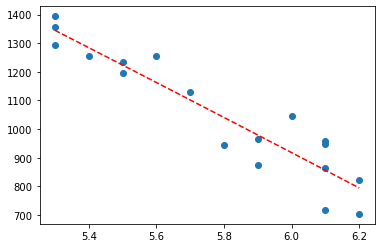

In [145]:
point=np.arange(5.3, 6.2, 0.1)
plt.scatter(train_input, train_target)
plt.plot(point, lr.coef_[0]*point**2 + lr.coef_[1]*point + lr.intercept_,
        color='red', linestyle='--')
plt.show()